**Objective**: The objective is to find out some relation between the features of a mobile phone (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

**Data Fields**

* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

**Task 1**:- Prepare a complete data analysis report on the given data.

In [ ]:
# Connecting to drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the CSV file

df = pd.read_csv("/content/drive/MyDrive/datasets_11167_15520_train.csv")

# Basic Checks

In [ ]:
# Displaying the First 5 rows

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# displays last 5 rows

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Shape of dataframe

df.shape

(2000, 21)

In [ ]:
# no of columns

len(df.columns)

21

In [ ]:
# details about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# checking null values

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# description of data

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# transpose - using transpose data will be displayed rows as columns and vice versa

df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# minimum value of sc_w - Screen Width, px_height - Pixel Resolution Height cannot be 0

print(len(df[df.sc_w==0]))

print(len(df[df.px_height==0]))

180
2


In [ ]:
# replacing zero's with mean value

df['sc_w'][df[df.sc_w==0].index] = df['sc_w'].mean()
df['px_height'][df[df['px_height']==0].index]=df['px_height'].mean()

In [ ]:
# duplicate values

len(df[df.duplicated()])

0

In [ ]:
# column names

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# checking unique values

df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 16.9 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


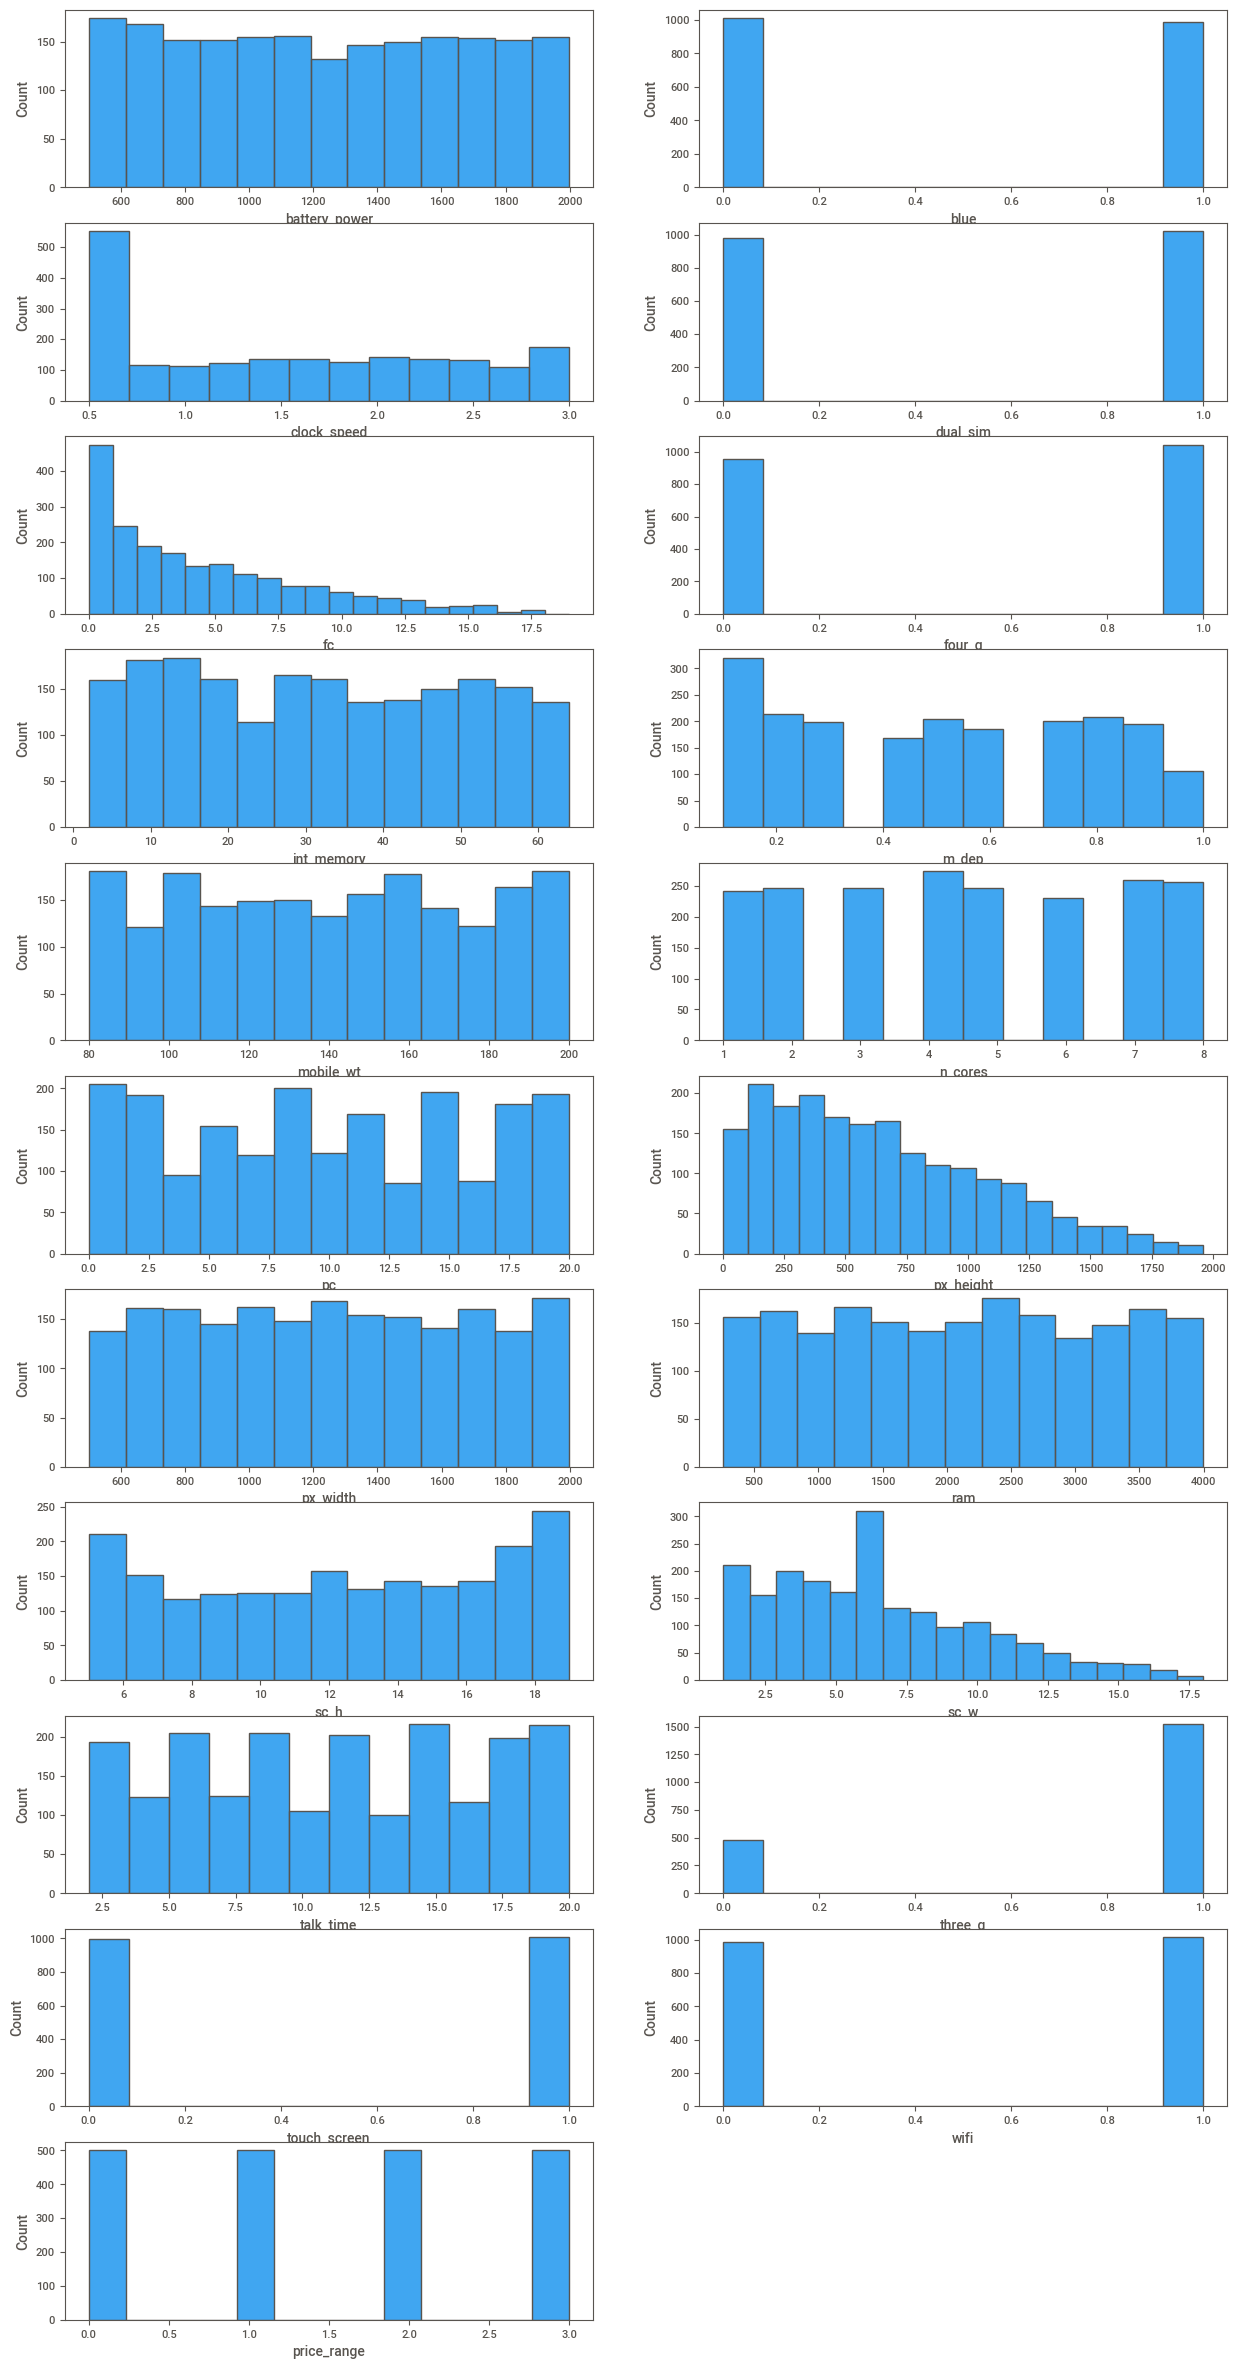

In [ ]:
# Bivariate Analysis

plt.figure(figsize=(15, 30), facecolor='white')
plotnumber =1

for column in df.columns:
  if plotnumber<=22:
    ax = plt.subplot(11,2, plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column, fontsize = 10)
  plotnumber+=1
plt.show()

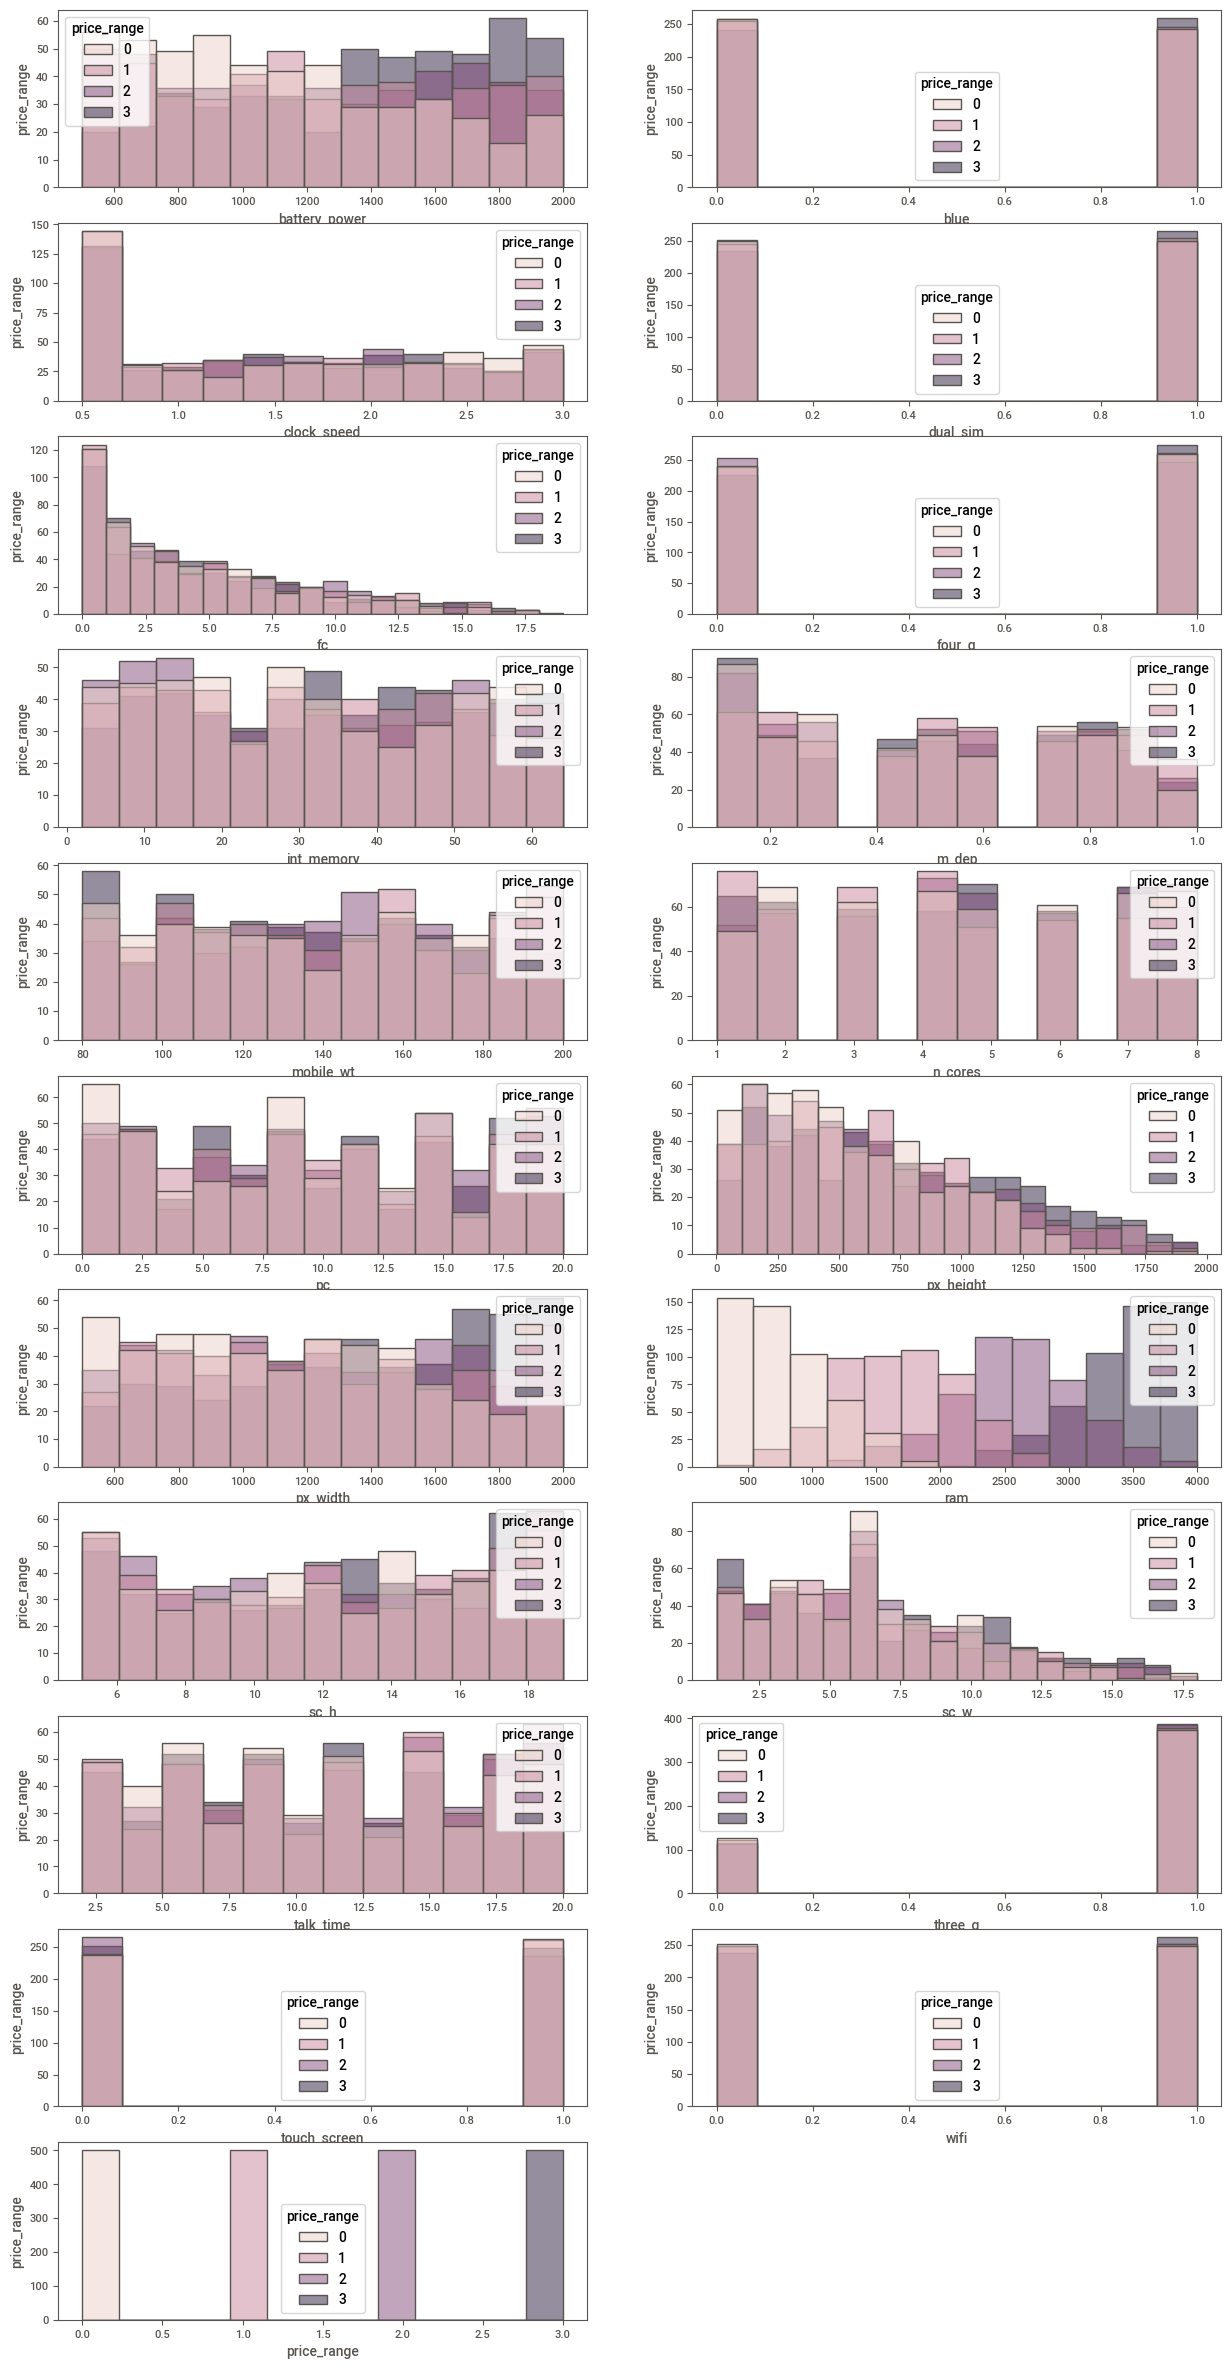

In [ ]:
# Mutivariate Analysis

plt.figure(figsize=(15, 30), facecolor= 'white')
plotnumber =1

for column in df.columns:
  plotnumber<=22
  ax=plt.subplot(11,2,plotnumber)
  sns.histplot(x=df[column], hue =df['price_range'])
  plt.xlabel(column, fontsize=10)
  plt.ylabel('price_range', fontsize=10)
  plotnumber+=1
plt.show()

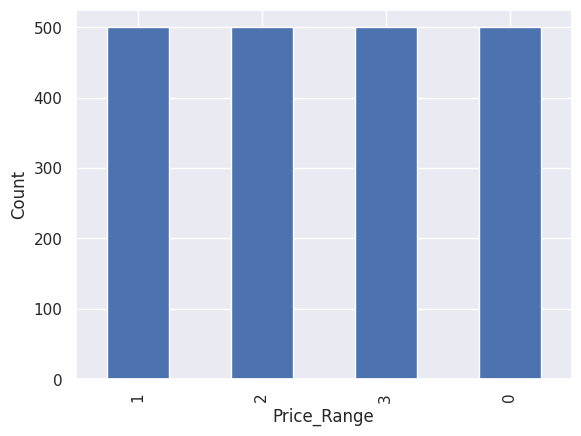

In [ ]:
# Plotting Individually
# Price

sns.set()
price_plot = df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Price_Range')
plt.ylabel('Count')
plt.show()

Insight: There are 4 different price_range values and the elements in it are almost same.

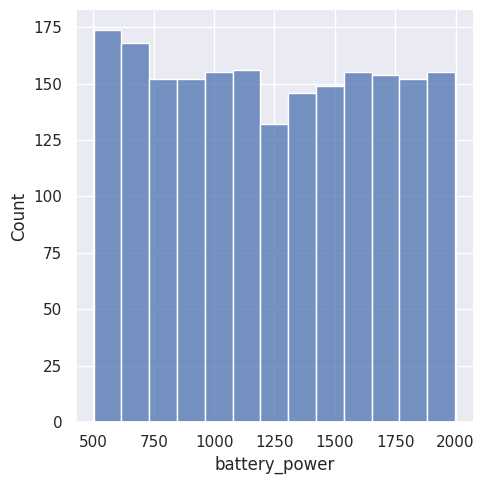

In [ ]:
# Battery Power

ax=sns.displot(df["battery_power"])
plt.show()

Insight: We can how the battery mAh is spread.

<Axes: xlabel='blue', ylabel='price_range'>

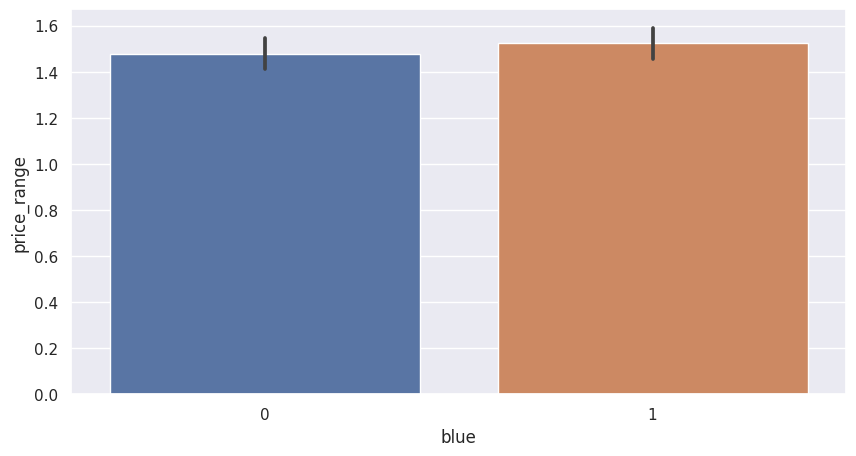

In [ ]:
# Bluetooth

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)

Insight: From this plot, we can see the half of the devices have bluetooth and half don't

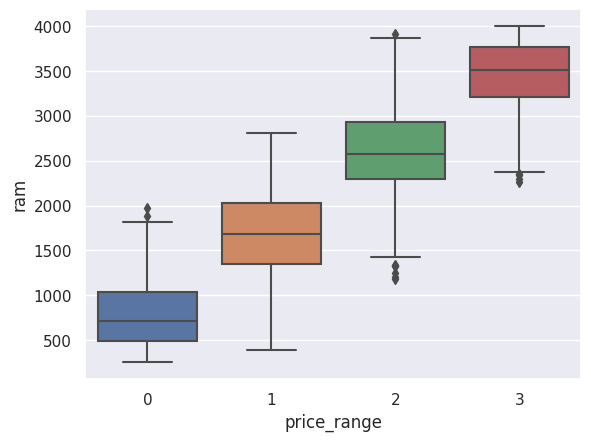

In [ ]:
# ram

sns.boxplot(data=df,x='price_range',y='ram')
plt.show()

<Axes: xlabel='px_width', ylabel='Density'>

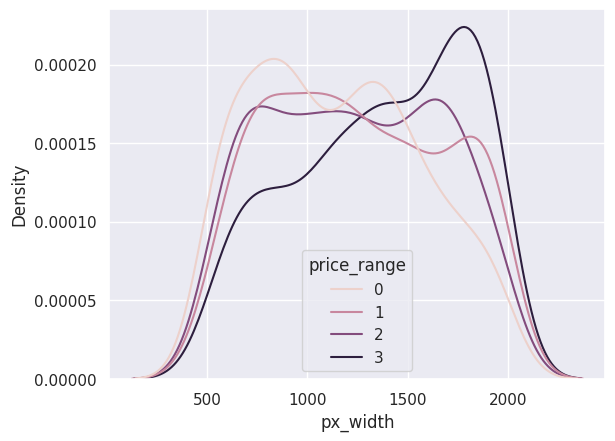

In [ ]:
# px_width

sns.kdeplot(data=df, x='px_width', hue='price_range')

Insight: There is a continuous increase pixel width as we move from low cost to high cost.  

<Axes: xlabel='px_height', ylabel='Density'>

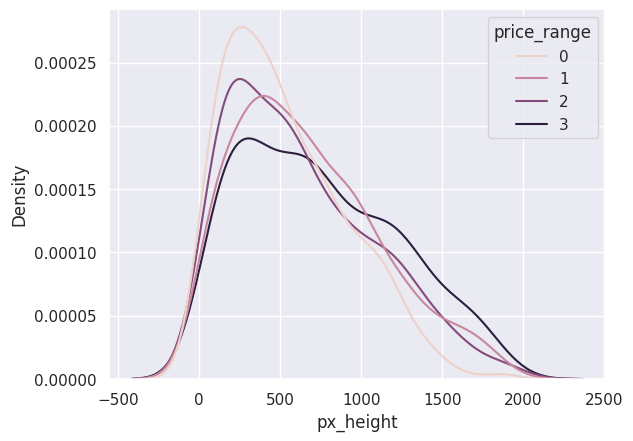

In [ ]:
# pixel height

sns.kdeplot(data=df, x='px_height', hue='price_range')

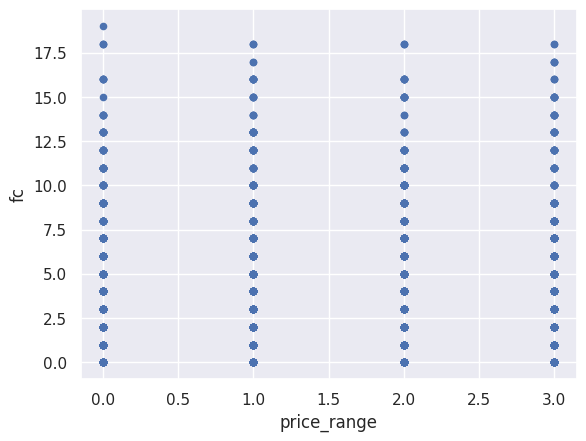

In [ ]:
# front camera mega pixels

df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

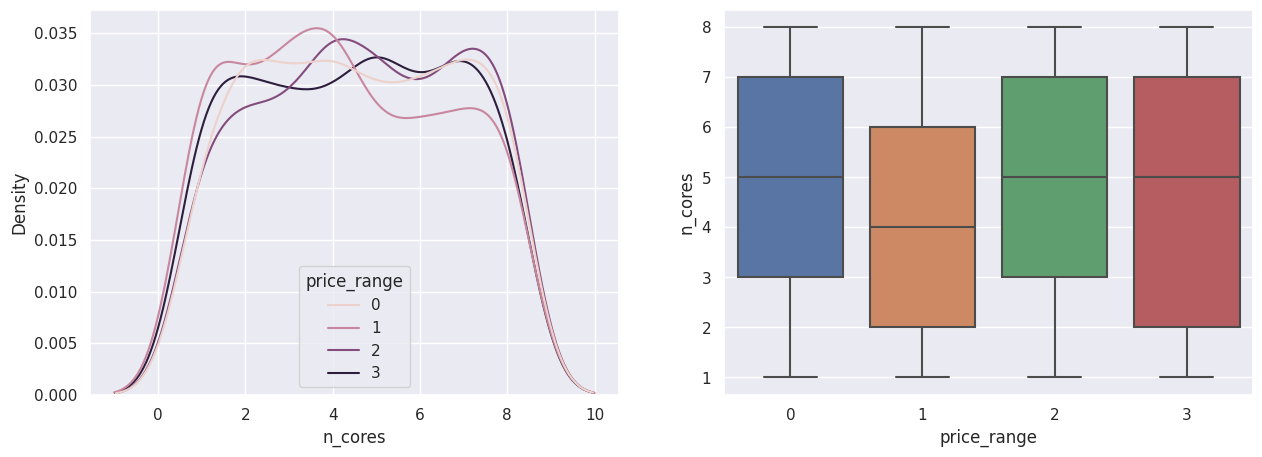

In [ ]:
# Primary camera Megapixels

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Insight: Primary camera megapixels are showing a little variation along the target categories.

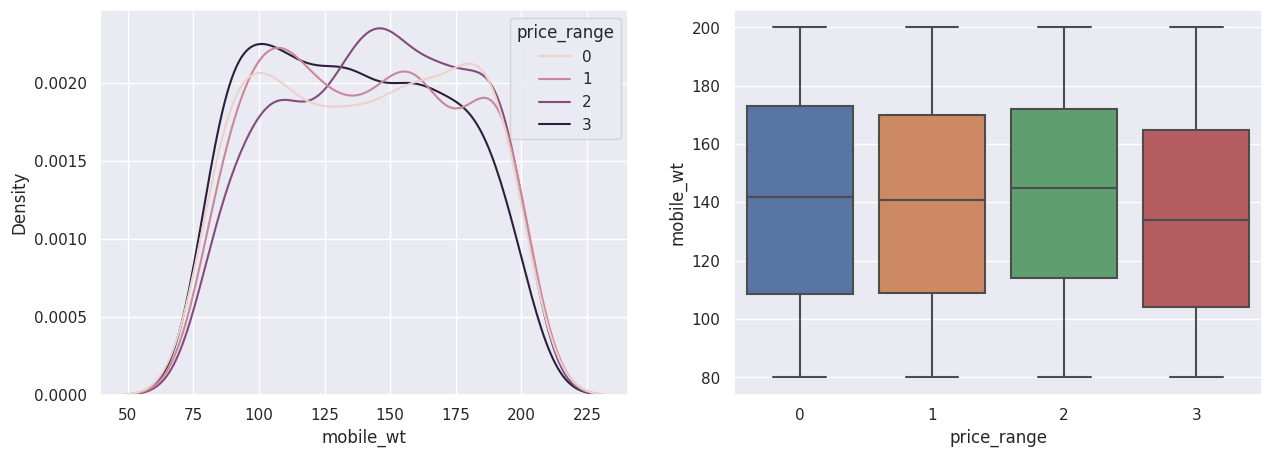

In [ ]:
# mobile weight

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

# Screen Size

In [ ]:
# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

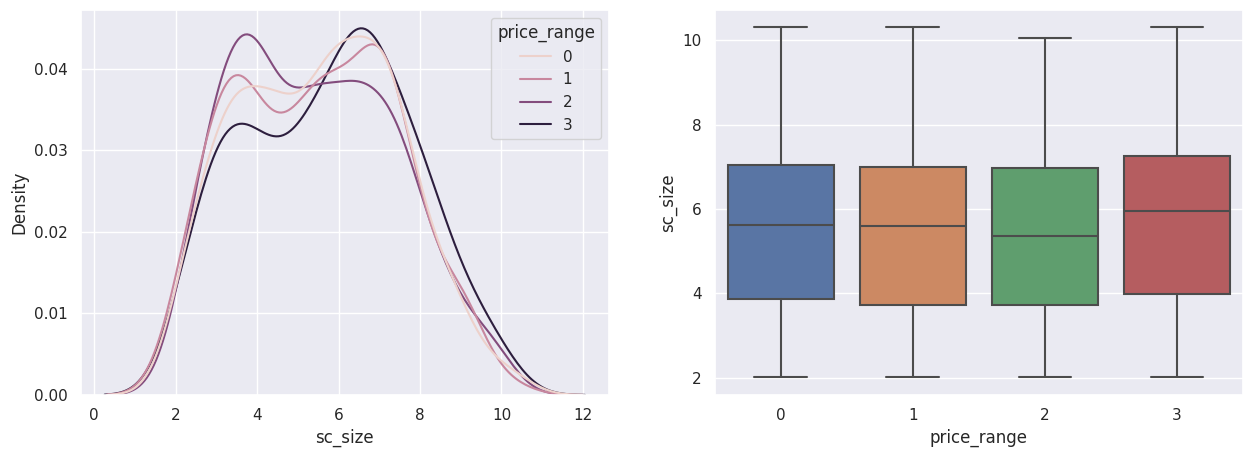

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Insight: From the above plot, we can see the Screen Size shows little variation along the target variables. And this can be helpful in predicting the target categories.

In [ ]:
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

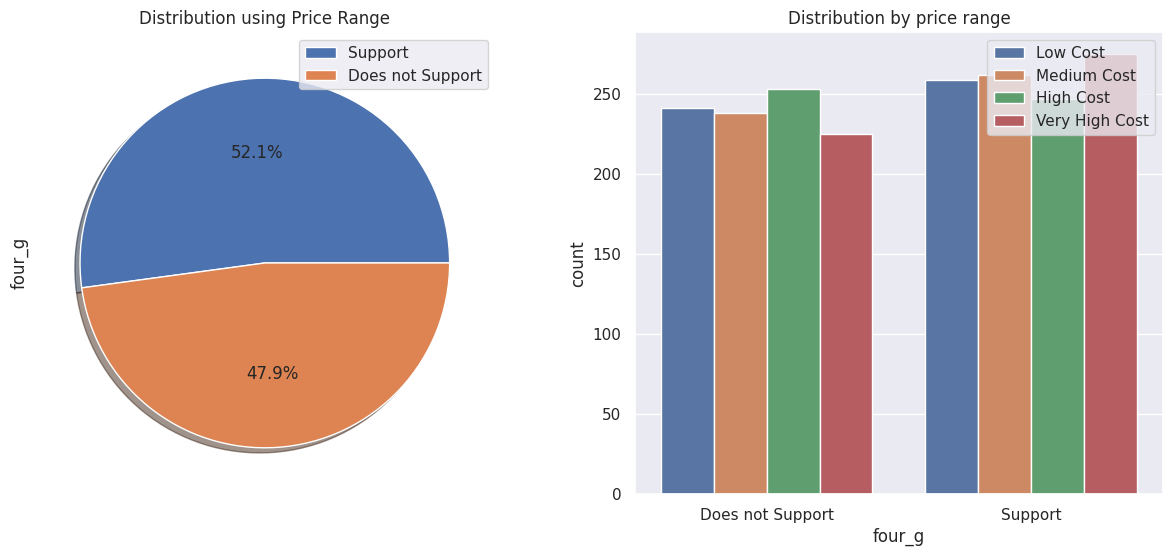

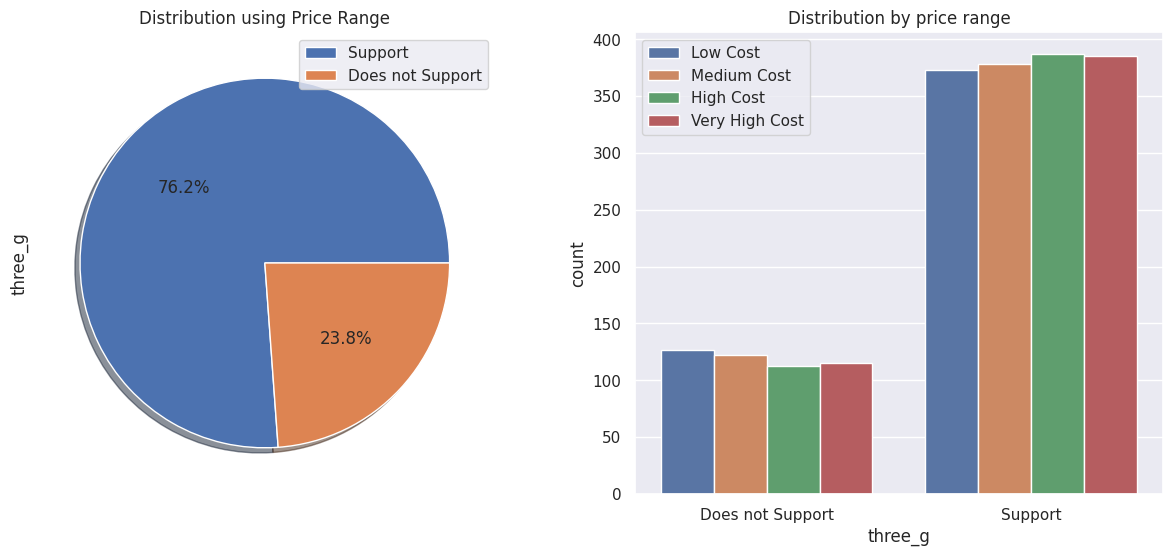

In [ ]:
binary_features = ['four_g', 'three_g']

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))
  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution using Price Range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2)
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

Insight: from this plots, we can find the feature 3G plays an important role.

<Axes: >

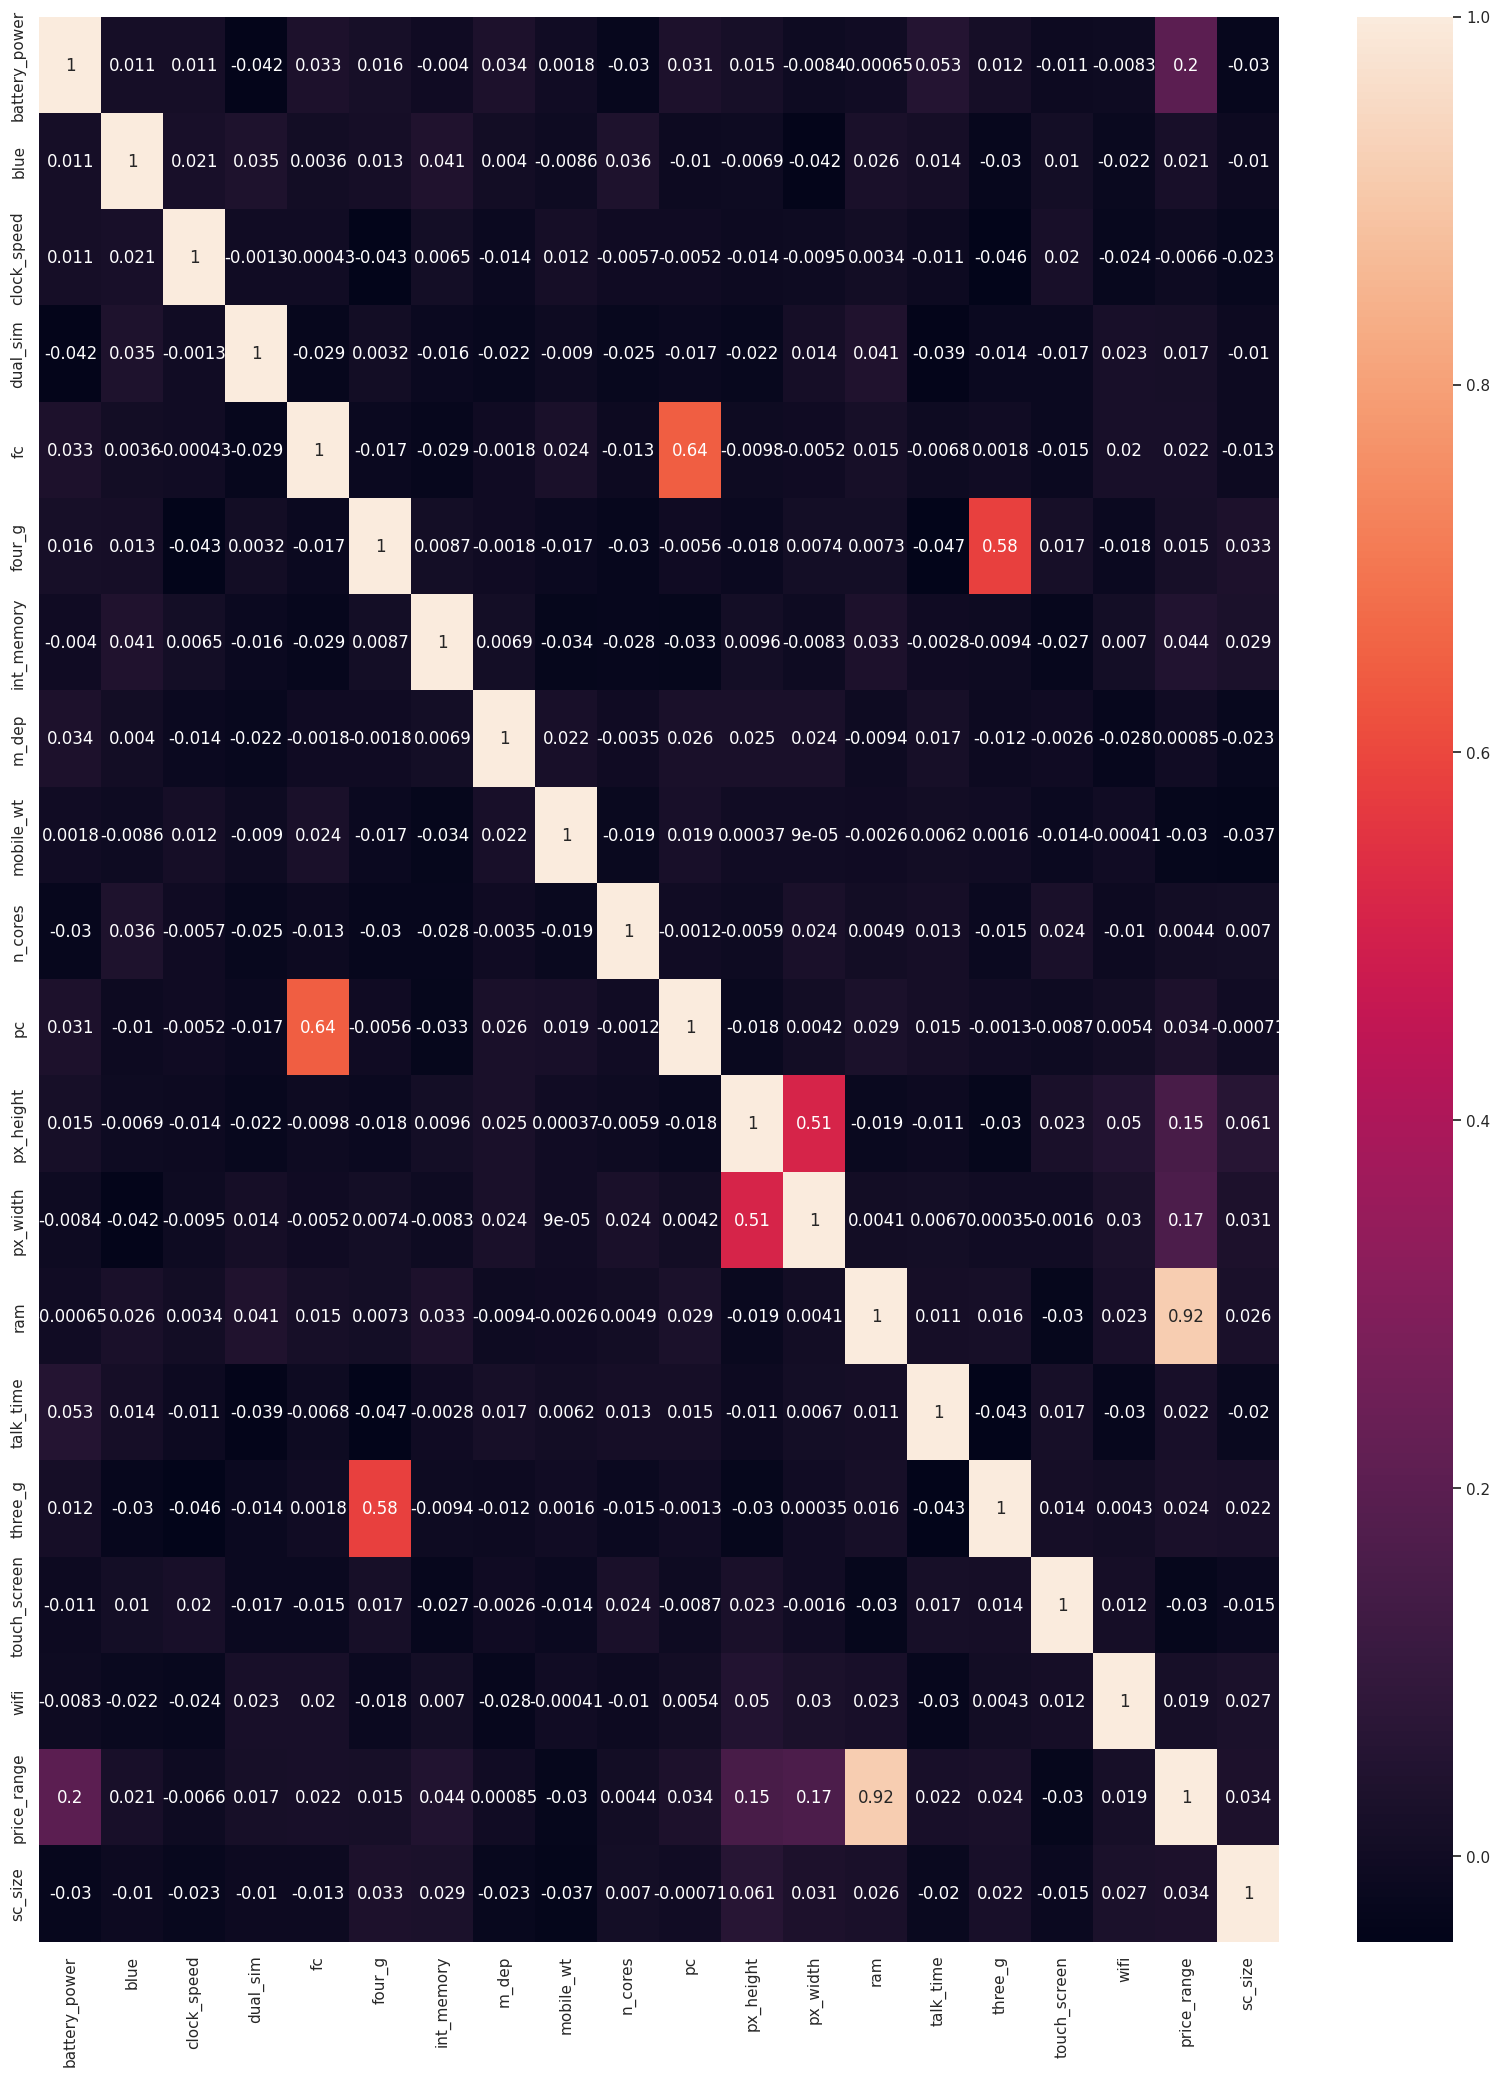

In [ ]:
correlation = df.corr()
plt.figure(figsize = [20, 25])
sns.heatmap(correlation, annot = True)

Insight: Ram and Price_Range have high correlation and Ram plays major part. There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height').

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

<Axes: >

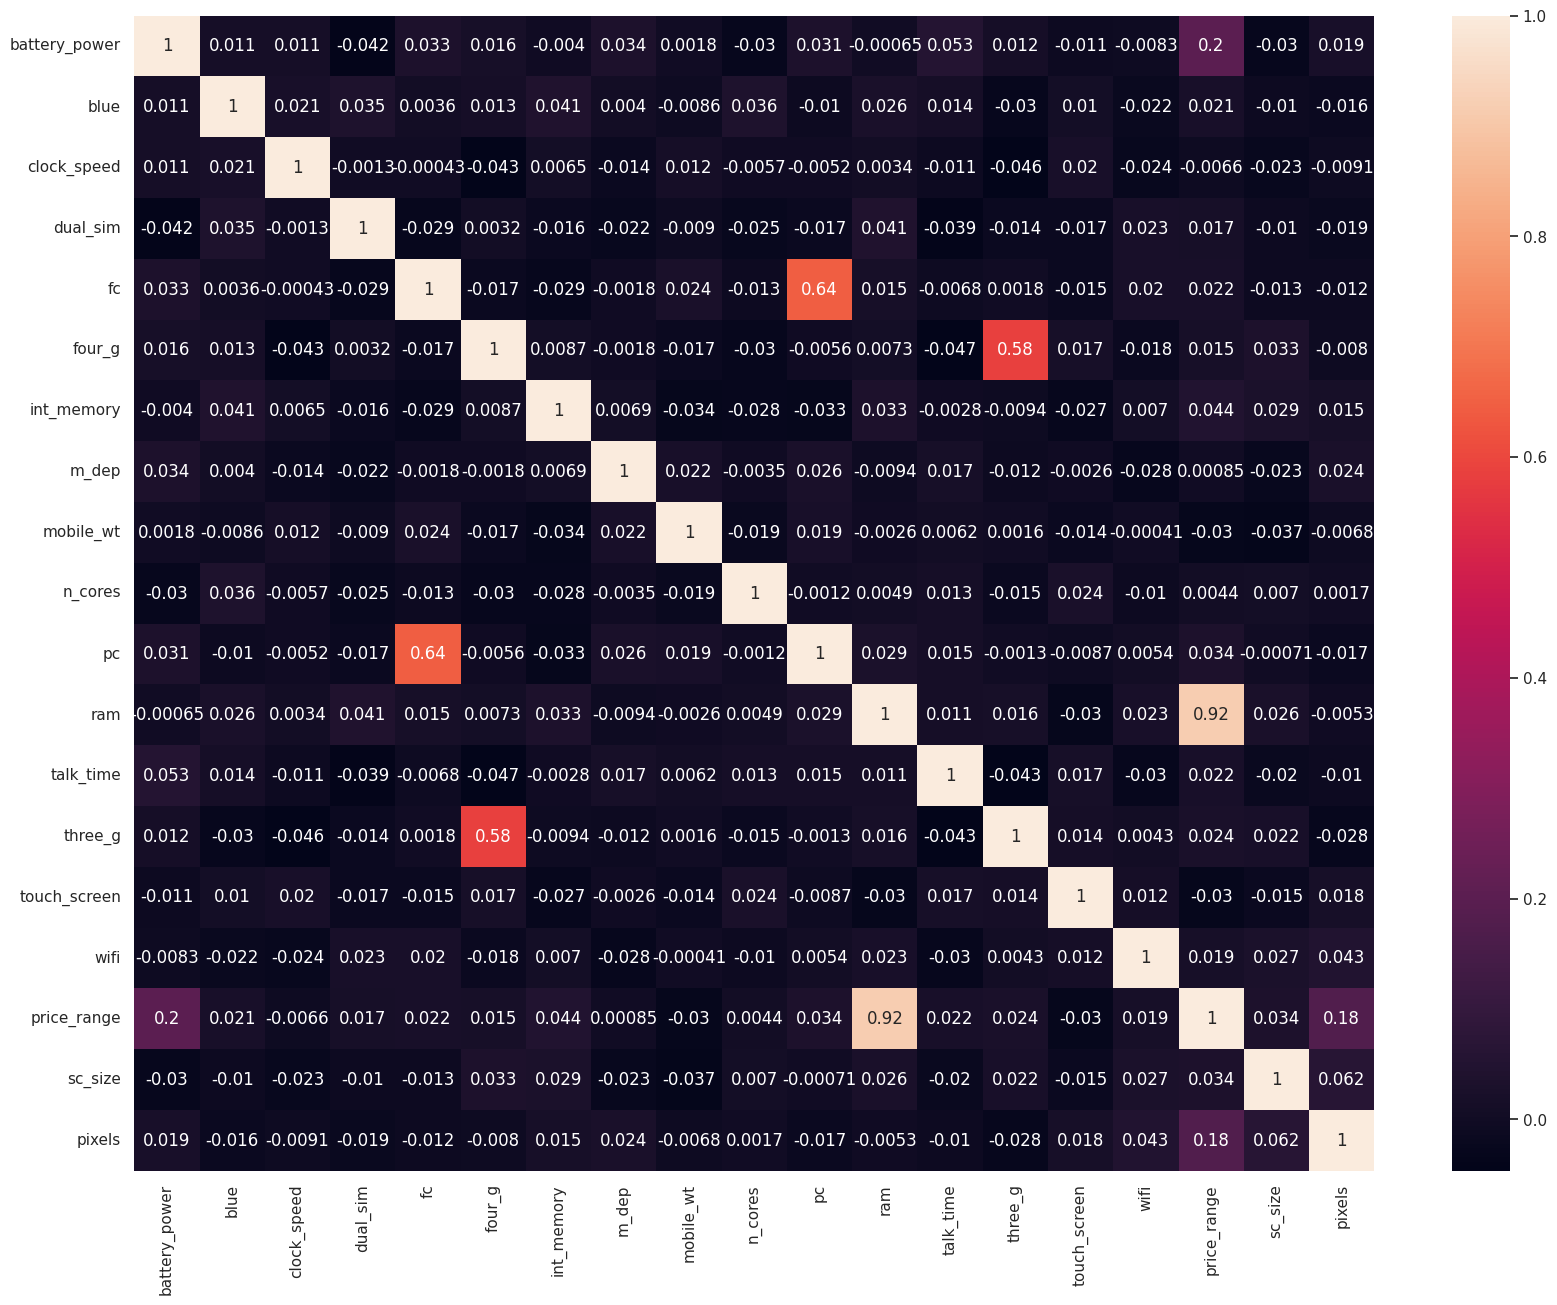

In [ ]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']

# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, annot = True)

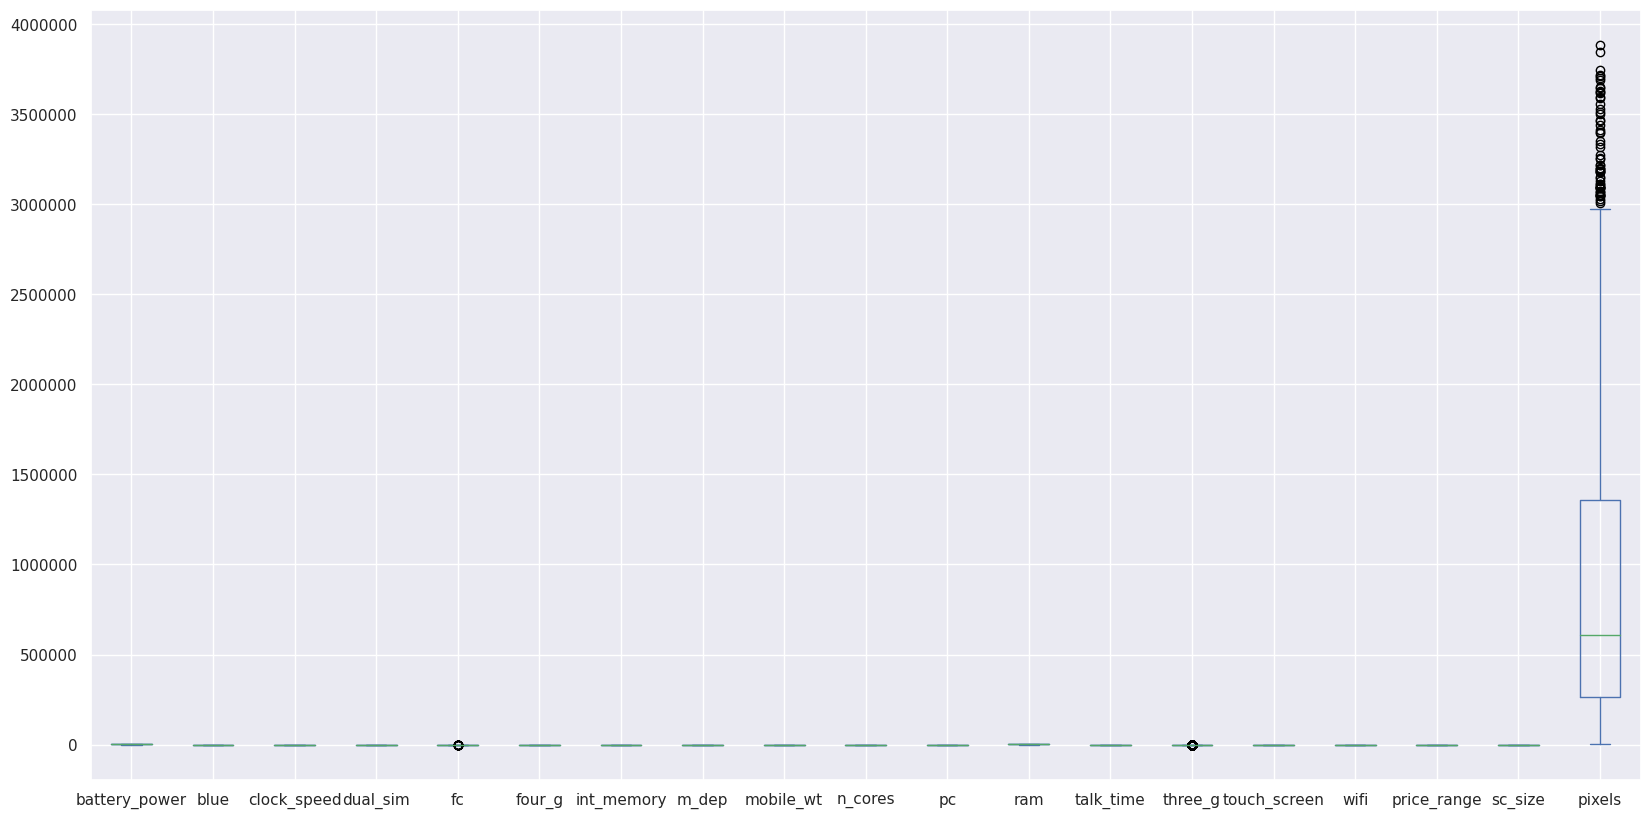

In [ ]:
df.plot(kind='box',figsize=(20,10))
plt.show()

In [ ]:
# Defining X and y

X = df.drop(['price_range'], axis=1)
y = df['price_range']

In [ ]:
# Normalizeing the date using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting the date

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(1600, 18)

In [ ]:
y_train.shape

(1600,)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 1, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 0, 1, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [ ]:
y_pred_train = LR.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       105
           1       0.87      0.86      0.86        91
           2       0.82      0.82      0.82        92
           3       0.93      0.92      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.90      0.89       400



<Axes: >

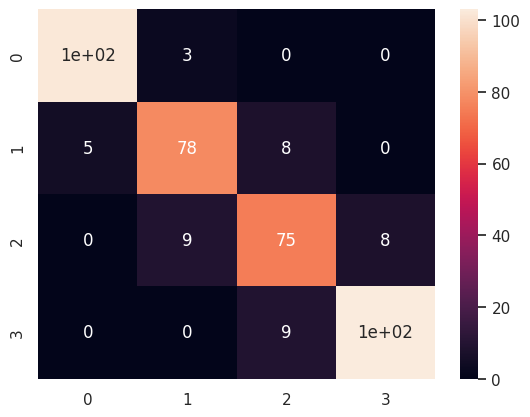

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.89      0.89      0.89       409
           2       0.90      0.86      0.88       408
           3       0.93      0.96      0.95       388

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



# Decision Tree

In [ ]:
from collections import Counter

In [ ]:
# Balencing the data

from imblearn.over_sampling import SMOTE
sm = SMOTE()
print(Counter(y))
X_sm, y_sm = sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({1: 500, 2: 500, 3: 500, 0: 500})
Counter({1: 500, 2: 500, 3: 500, 0: 500})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [ ]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DTC_Predict = DTC.predict(X_test)

In [ ]:
DTC_Pred_Train = DTC.predict(X_train)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_train, DTC_Pred_Train) # accuaracy score for trained data
acc

1.0

In [ ]:
acc_test = accuracy_score(y_test, DTC_Predict)
acc_test # accuracy score for test data

0.8325

In [ ]:
print(classification_report(y_test, DTC_Predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.74      0.82      0.78        91
           2       0.74      0.68      0.71        92
           3       0.89      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [ ]:
pd.crosstab(y_test, DTC_Predict)

col_0,0,1,2,3
price_range,,,,
0,94,11,0,0
1,5,75,11,0
2,0,16,63,13
3,0,0,11,101


[[ 94  11   0   0]
 [  5  75  11   0]
 [  0  16  63  13]
 [  0   0  11 101]]


<Axes: >

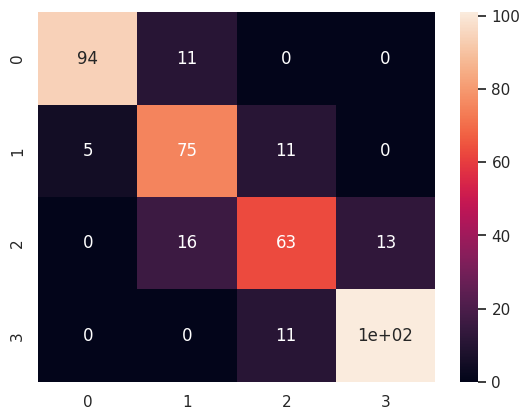

In [ ]:
cf_matrix = confusion_matrix(y_test, DTC_Predict)

print(cf_matrix)

sns.heatmap(cf_matrix, annot=True)

## Hyperparameters of DecisionTree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 5)
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
grid.fit(X_train,y_train) #training data on gridsearch cv
best_params = grid.best_params_ # it will give you best parameters
print(f"Best paramters: {best_params})") # printing  best parameters

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

In [ ]:
grid.best_params_

{'max_depth': 30, 'max_leaf_nodes': 100}

In [ ]:
grid.best_score_

0.8425

In [ ]:
dt1=DecisionTreeClassifier(max_depth = 30, max_leaf_nodes = 100) #passing best parameter to decision tree

In [ ]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)

In [ ]:
y_pred1=dt1.predict(X_test)#predicting
y_pred1

array([0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 3, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 1, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 1, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 1, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 3, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 2, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 3, 2, 1, 0, 3, 3, 0, 2, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 1, 3, 0, 1, 3, 2, 3, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
acc_test=accuracy_score(y_test,y_pred1)#checking accuracy
acc_test

0.84

In [ ]:
test_f1=f1_score(y_test,y_pred1, average = 'weighted') #f1_score
test_f1

0.8401968111077204

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.73      0.85      0.79        91
           2       0.76      0.68      0.72        92
           3       0.89      0.91      0.90       112

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



[[ 94  11   0   0]
 [  4  77  10   0]
 [  0  17  63  12]
 [  0   0  10 102]]


<Axes: >

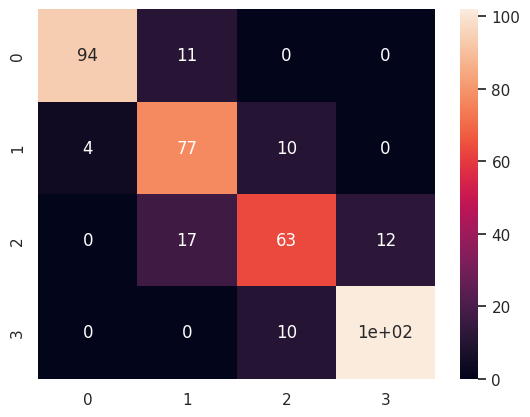

In [ ]:
cf_matrix_hy = confusion_matrix(y_test, y_pred1)

print(cf_matrix_hy)

sns.heatmap(cf_matrix_hy, annot=True)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_cf = RandomForestClassifier(n_estimators = 300)
rf_cf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_predict = rf_cf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.88      0.85      0.86        91
           2       0.80      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



## Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, param, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 40,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=40, max_features=4, max_leaf_nodes=40)

In [ ]:
clsr.best_score_

0.8585009297153224

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8775

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.85      0.85        91
           2       0.79      0.80      0.80        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 5, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.90      0.86        91
           2       0.81      0.84      0.82        92
           3       0.95      0.88      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.891 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.866 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.844 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.872 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.86      0.90      0.88        91
           2       0.84      0.88      0.86        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[ 98   7   0   0]
 [  6  82   3   0]
 [  0   6  81   5]
 [  0   0  12 100]]


# Conclusion

1. From the Exploratory Data Analysis (EDA), we can see that here are mobile phones in 4 price ranges and the elements are almost similar
2. Half devices have Bluetooth facility and half don't.
3. As the price range increases, there is a gradual increase in battery
4. While moving from Low cost to Very high cost, we can find the Ram has continuous increase with price range.
5. Costly phones are lighter
6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
7. From the above experiments, we can conclude that Logistic Regression and, XGboosting with using hyperparameters we got the best results.
